In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_parquet("../archivos/staging/staging.parquet")

In [10]:
df = df.drop("SimillarHTTP", axis=1)

In [24]:
for column in df.columns:
    if df[column].value_counts().count() == 1:
       df = df.drop(column, axis=1)

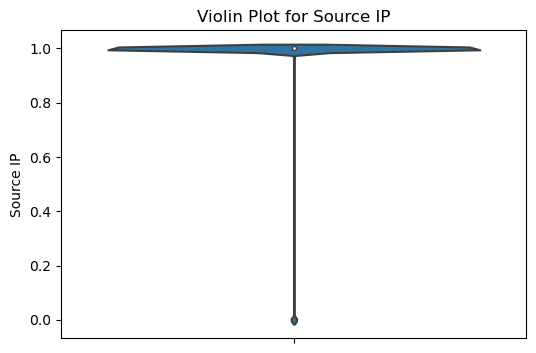

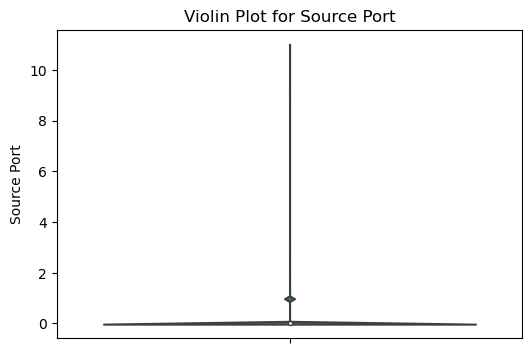

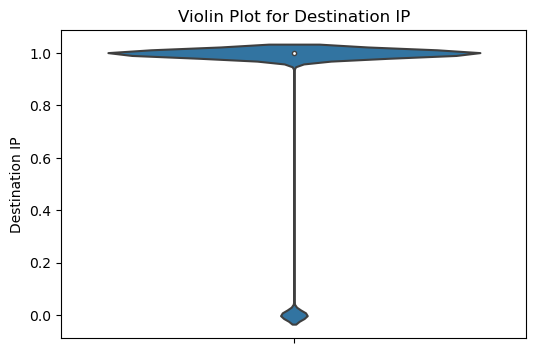

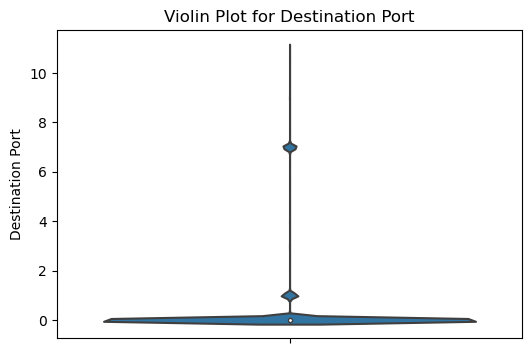

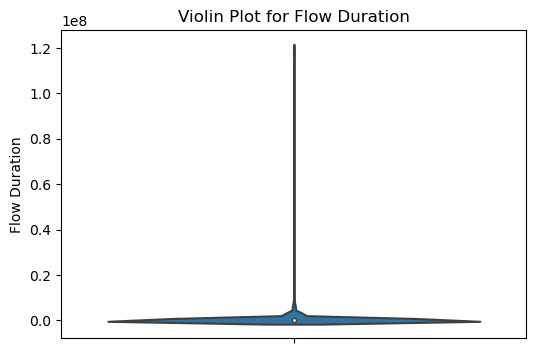

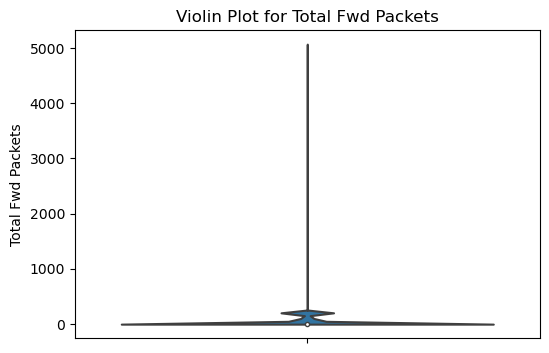

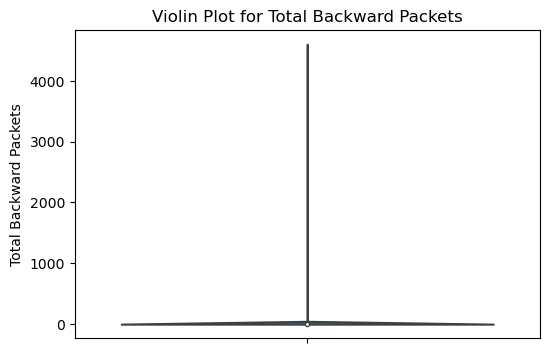

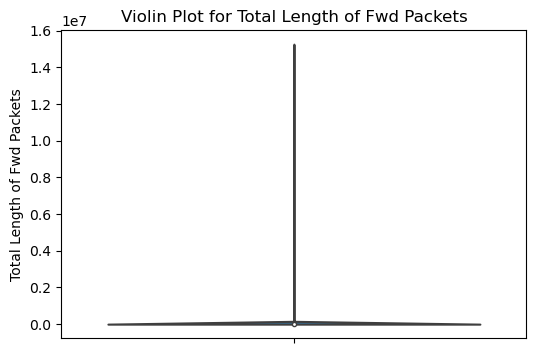

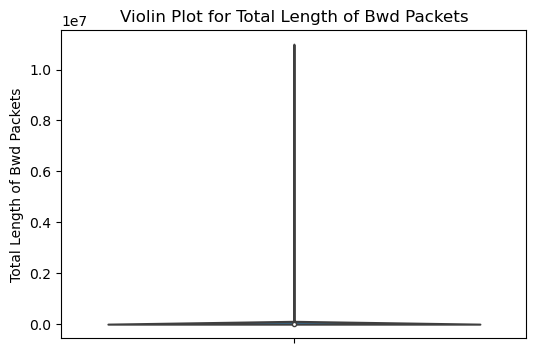

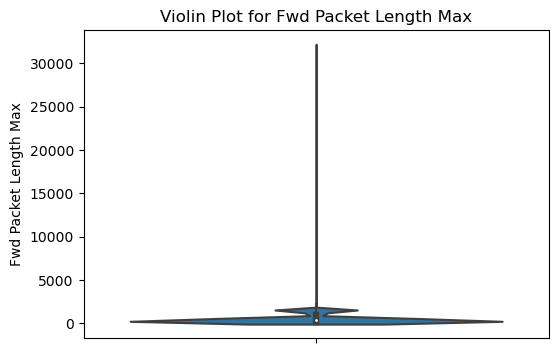

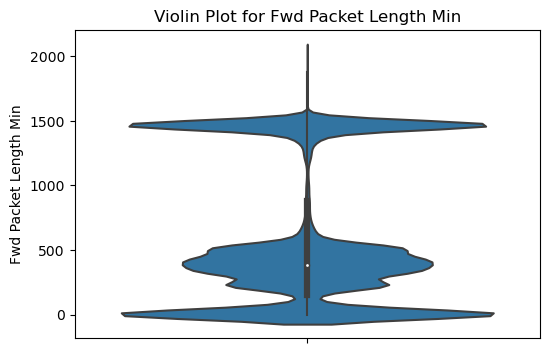

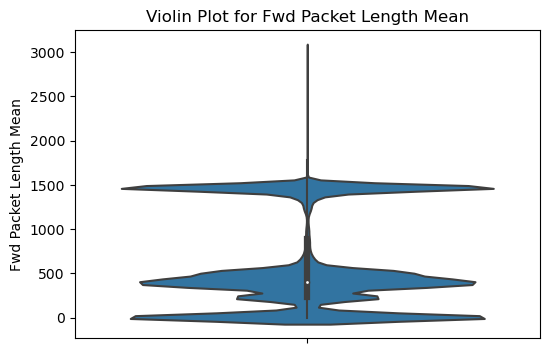

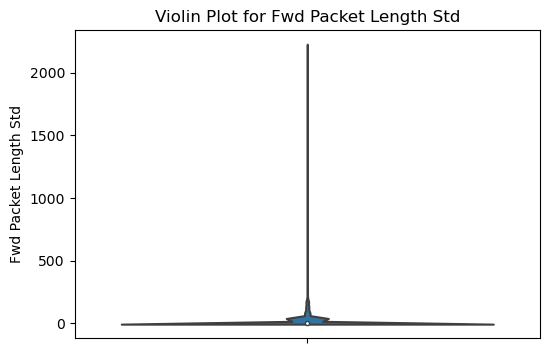

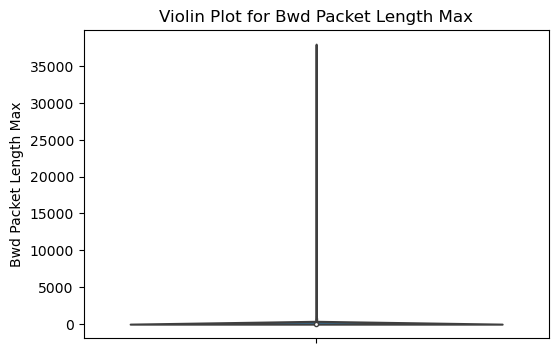

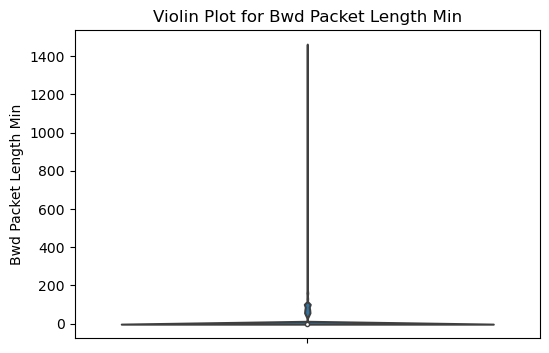

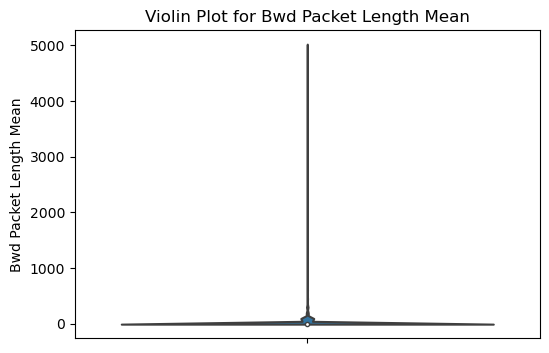

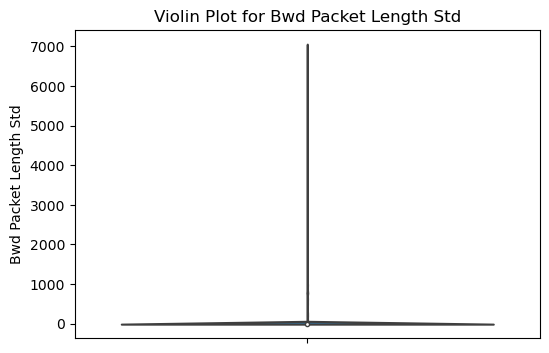

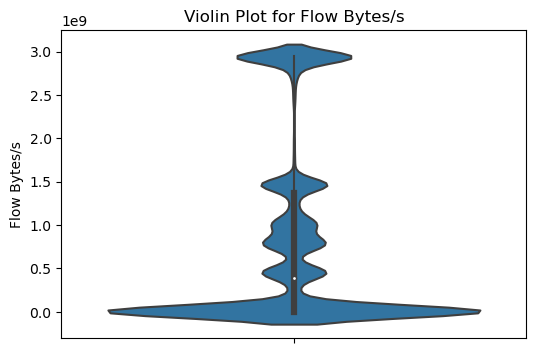

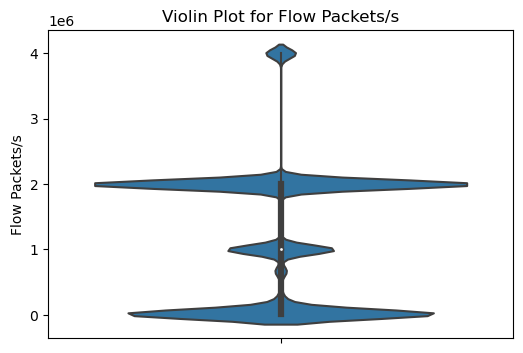

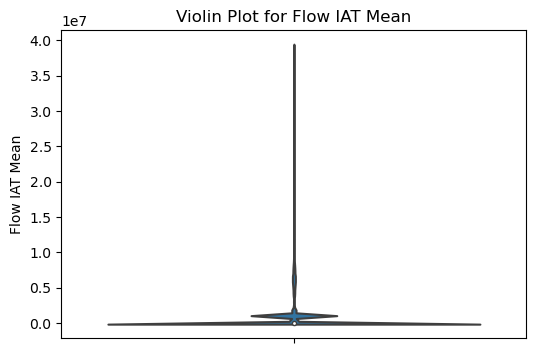

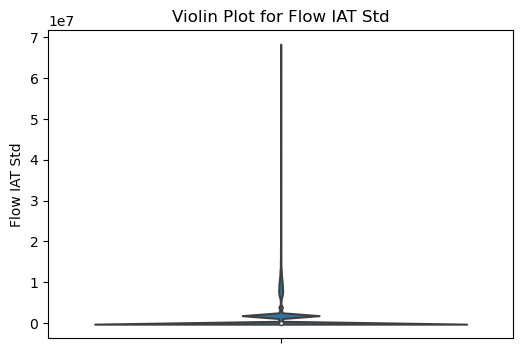

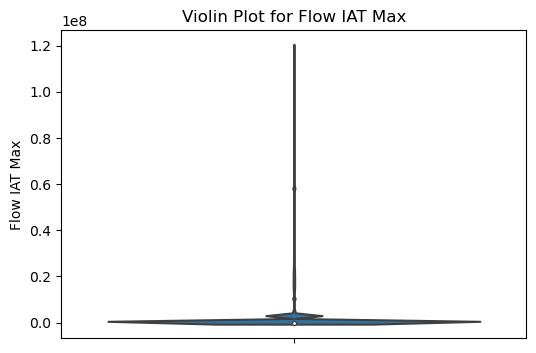

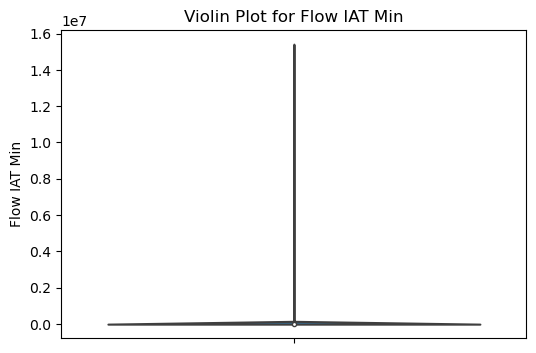

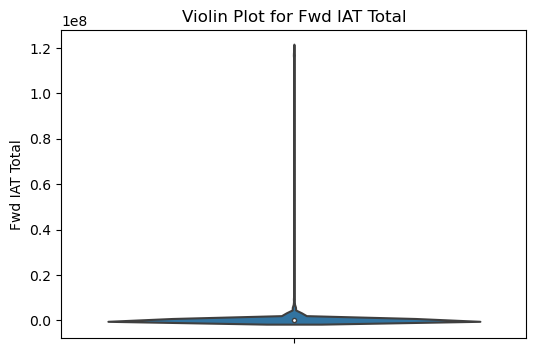

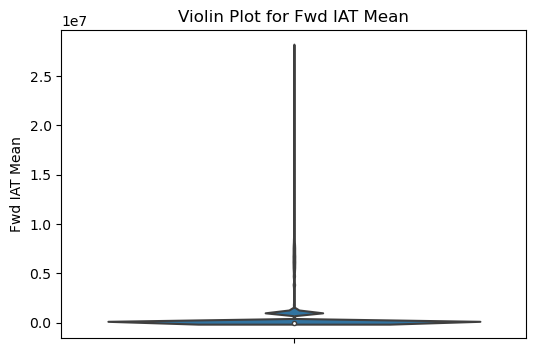

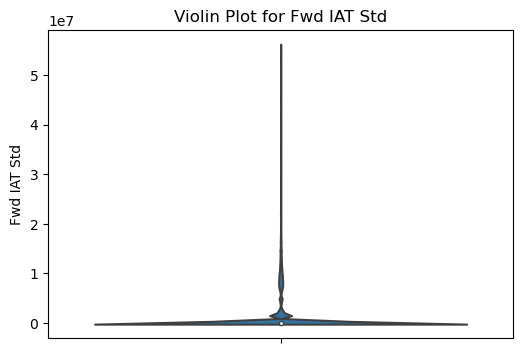

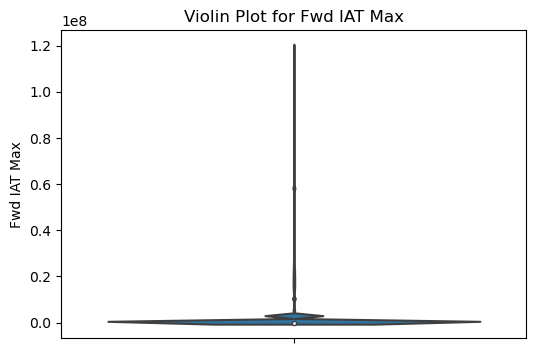

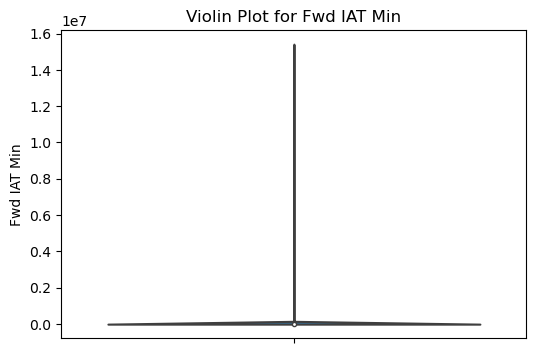

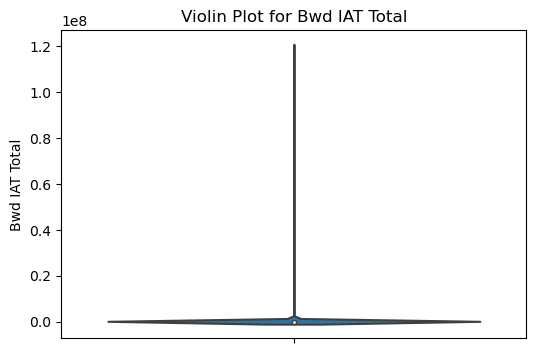

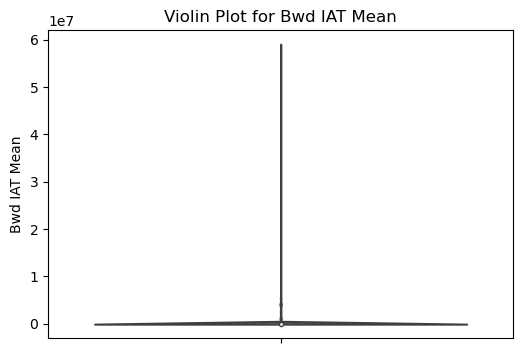

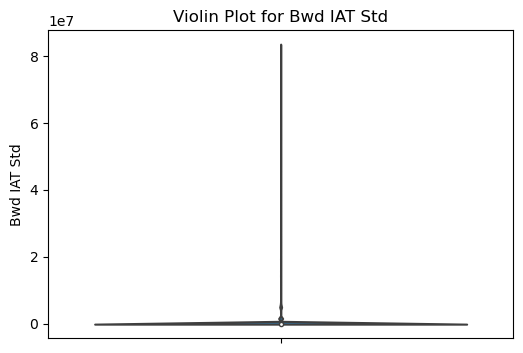

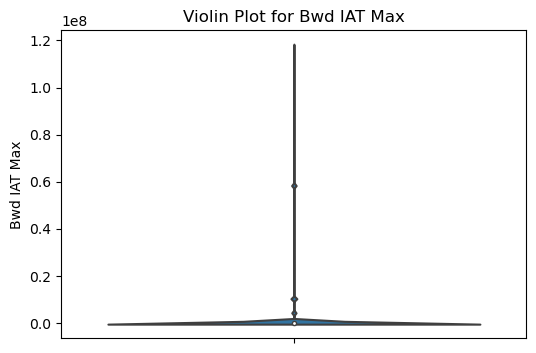

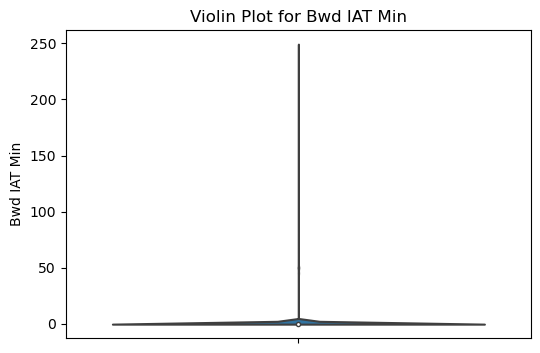

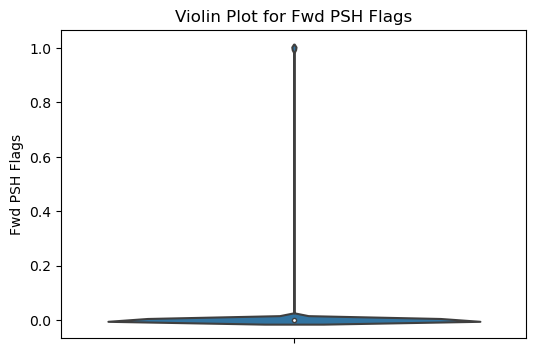

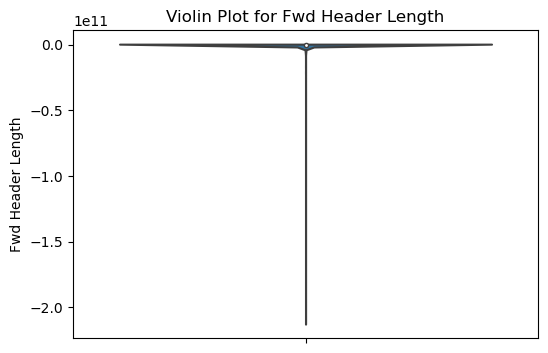

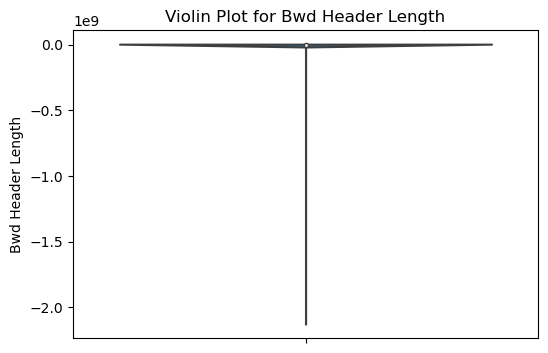

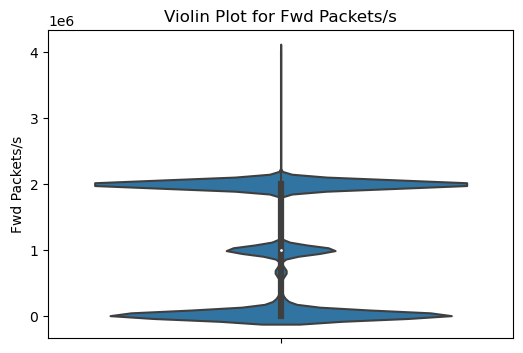

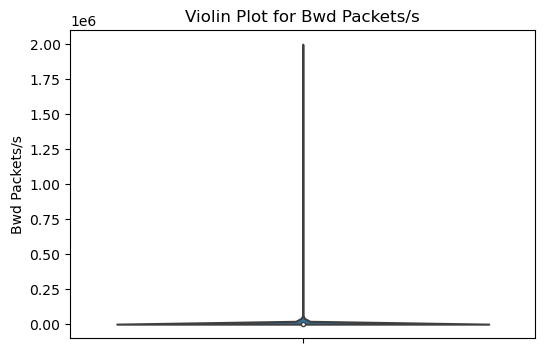

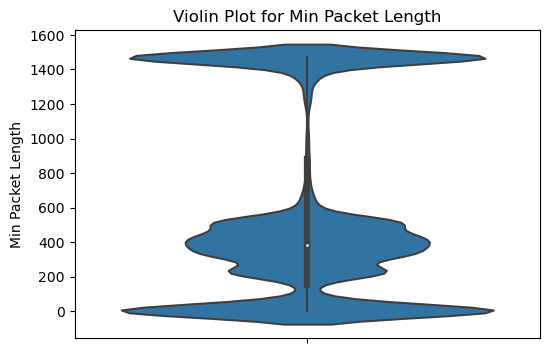

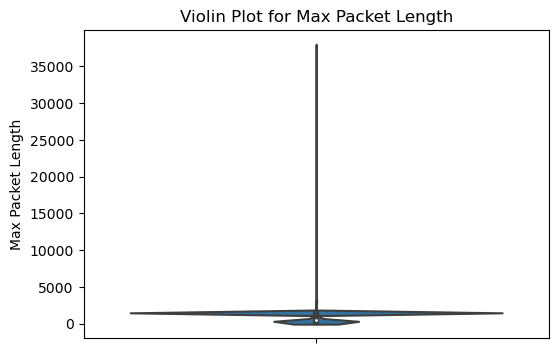

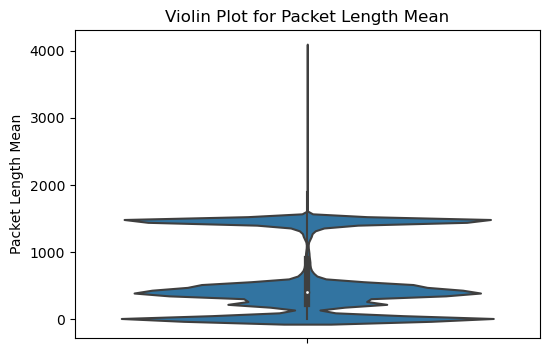

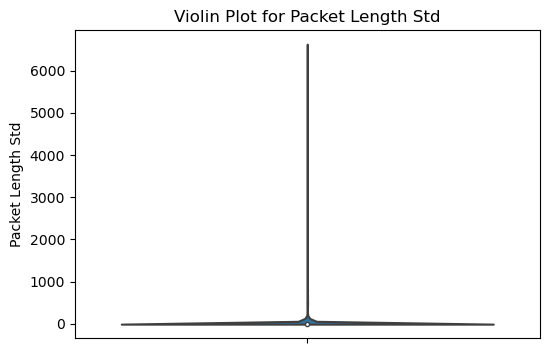

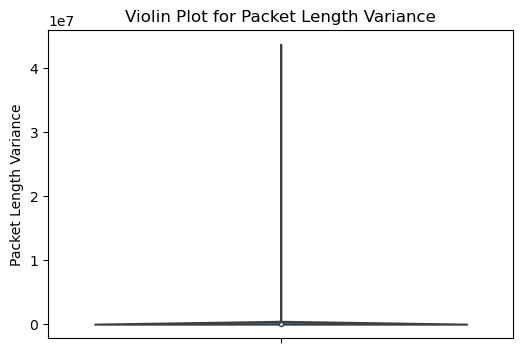

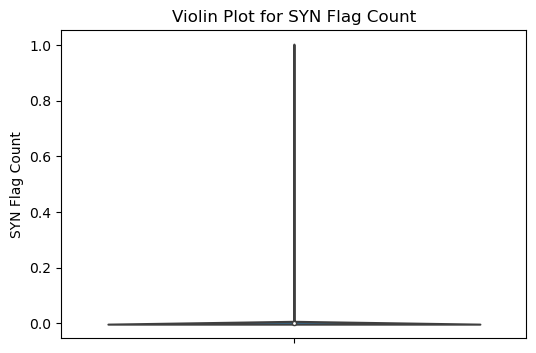

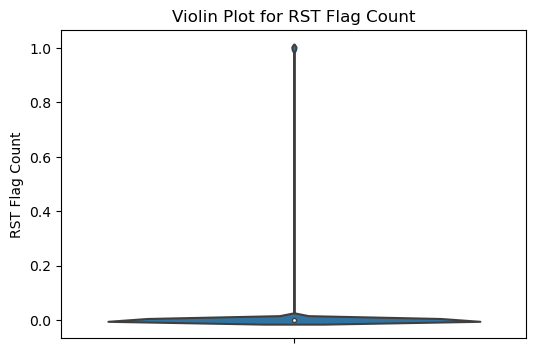

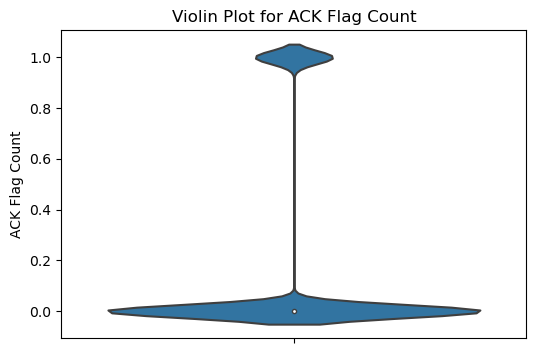

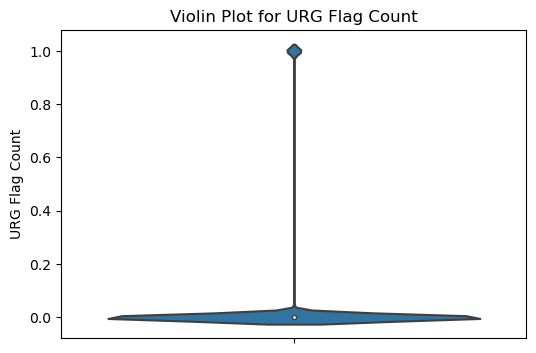

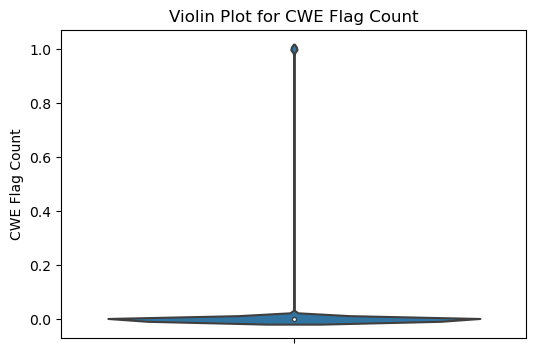

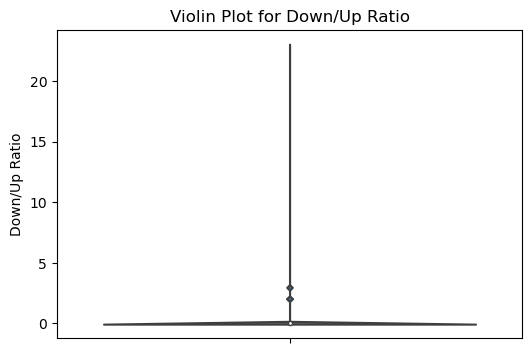

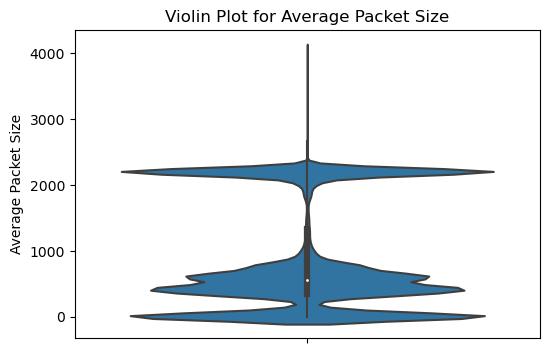

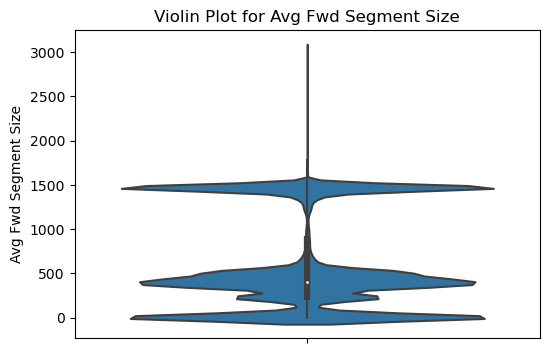

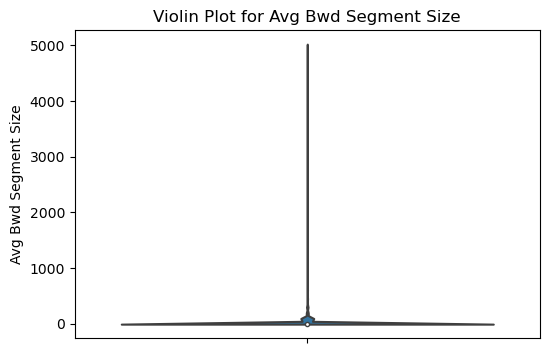

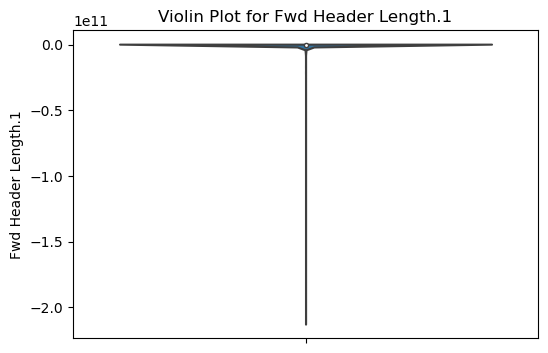

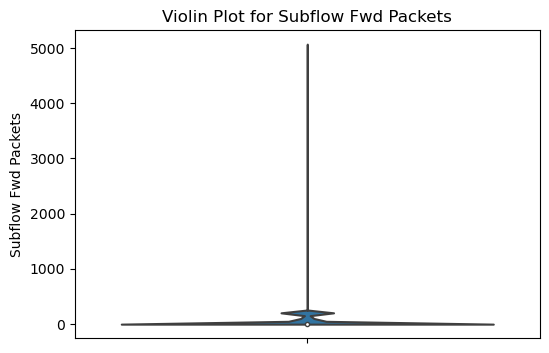

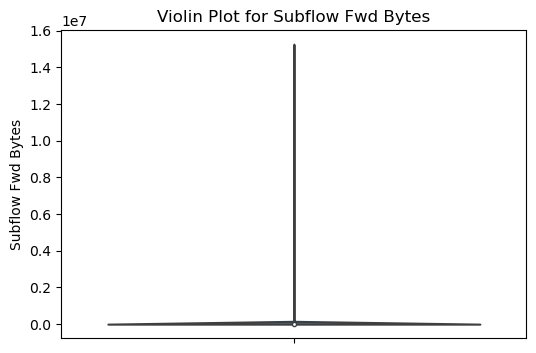

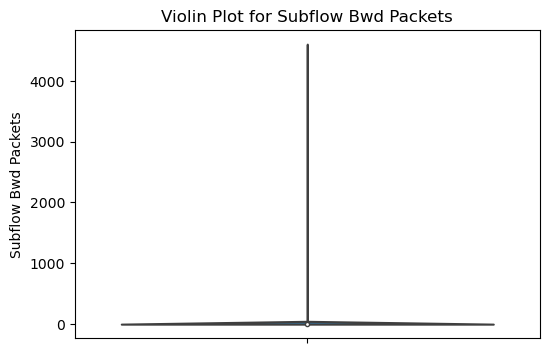

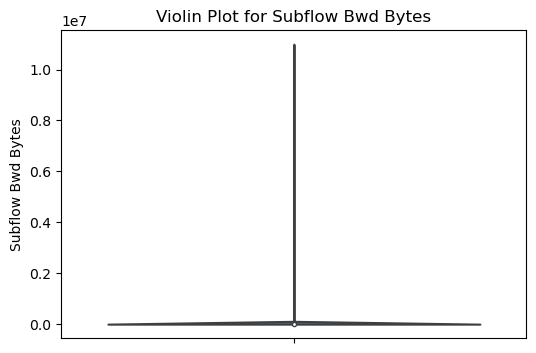

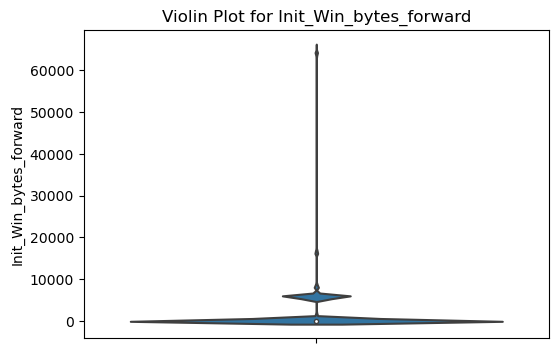

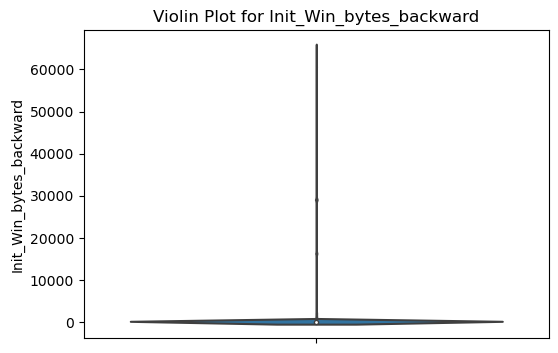

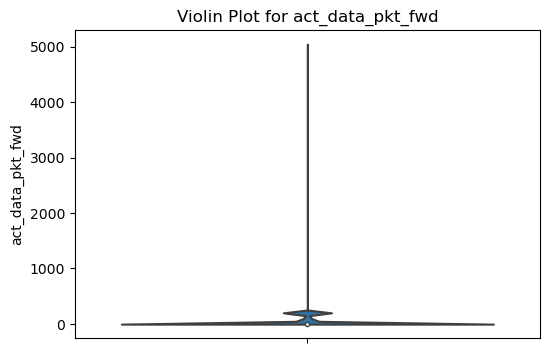

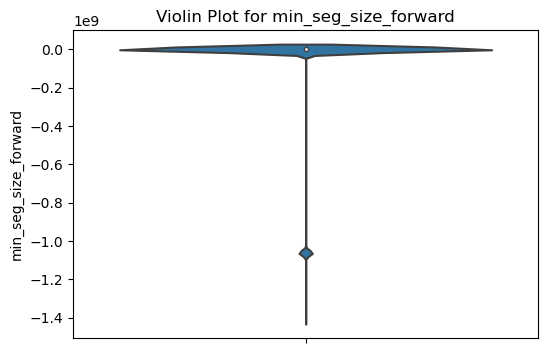

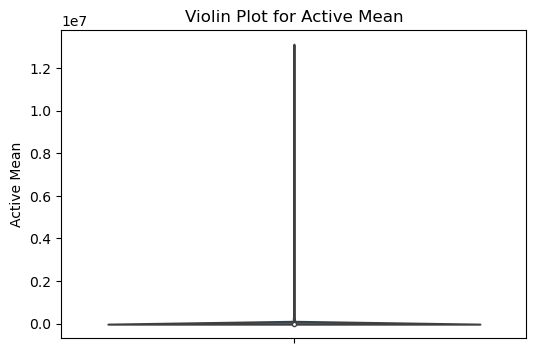

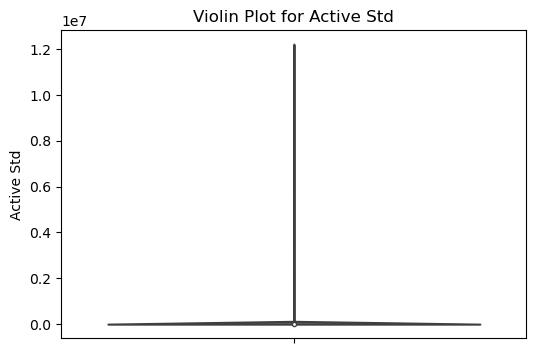

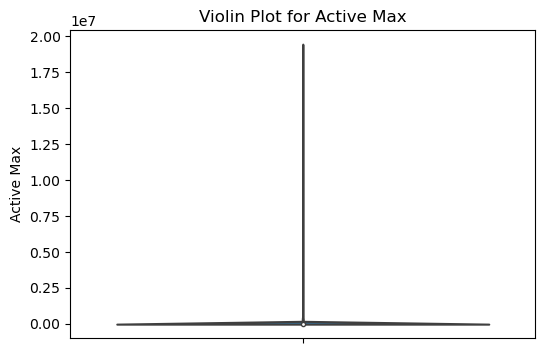

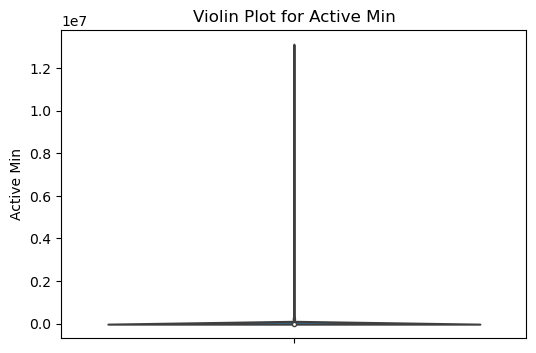

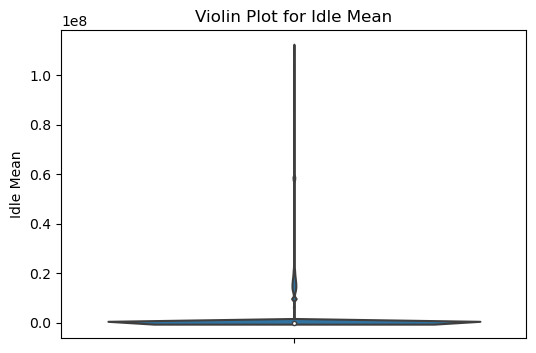

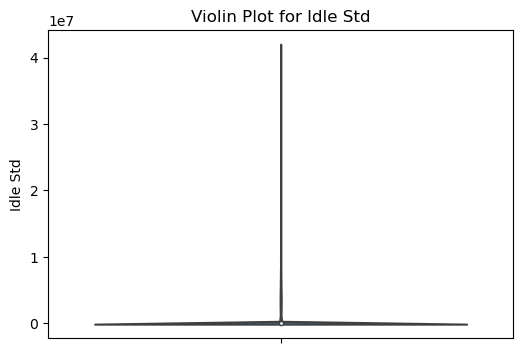

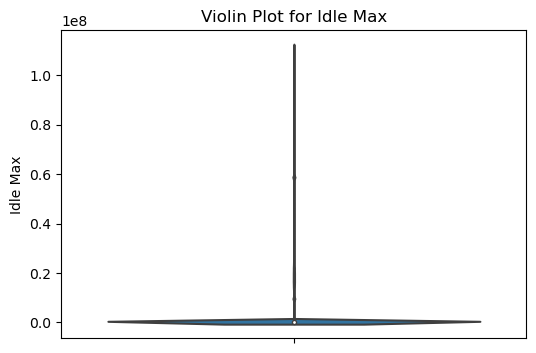

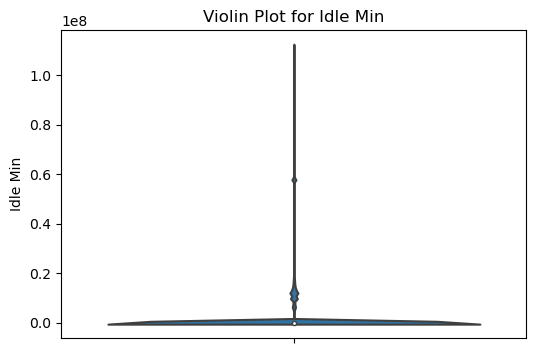

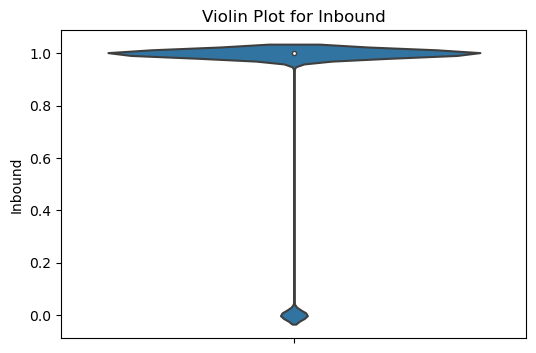

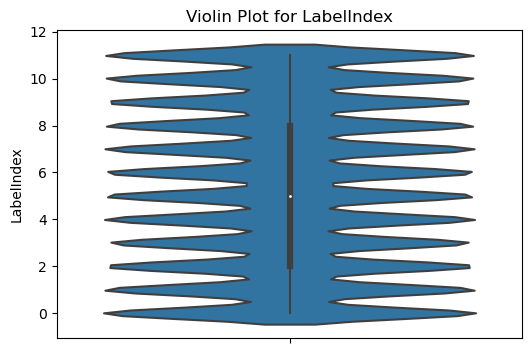

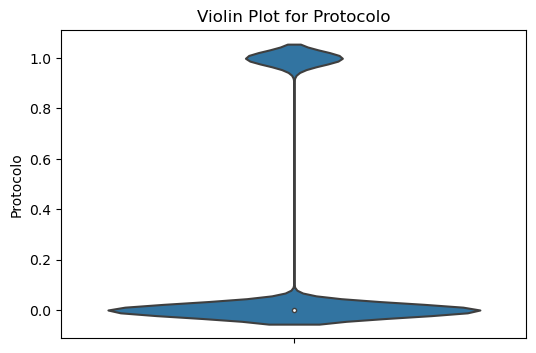

In [27]:
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.violinplot(data=df, y=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()